In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Non-linear Regression

In [3]:
x = np.linspace(0, 10, 100)
y = np.exp(x)

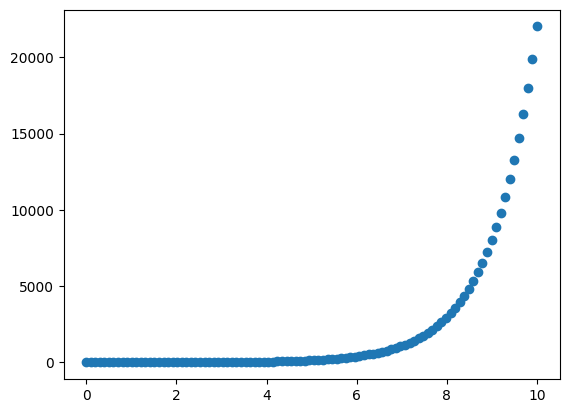

In [4]:
plt.scatter(x, y)

y^ = θ + θ1 * θ2^x

- Exponantial
- Quadratic
- Cubic
- ...

### Non-linear regression
- non-linear relationship between the dependet variable and a set of independent variables
- For a model to be considered non-linear y^ must be a non-linear function of the paramaters θ, not necessarily the features of x.
- in Non-linear regression, a model is non-linear by parameters.

How can I know if a problem is linear or non-linear?
- Visually figure out relation
- Calculate the correlation coefficient between independet and dependent variables
    - if for all variables it is 0.7 or higher there is a linearity, and it's not appropriate to fit a non-linear regression.


How should I model my data, if it displays non-linear on a scatterplot?
- Polynomial regression
- Non-linear regression model
- Transform your data

### Polynomial Regression

y^ = θ0 + θ1 * x + θ2 * x^2 + θ3 * x^3

Polynomial regression is considered to be a special case of traditional multiple linear regression.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("data/FuelConsumption.csv")

In [7]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

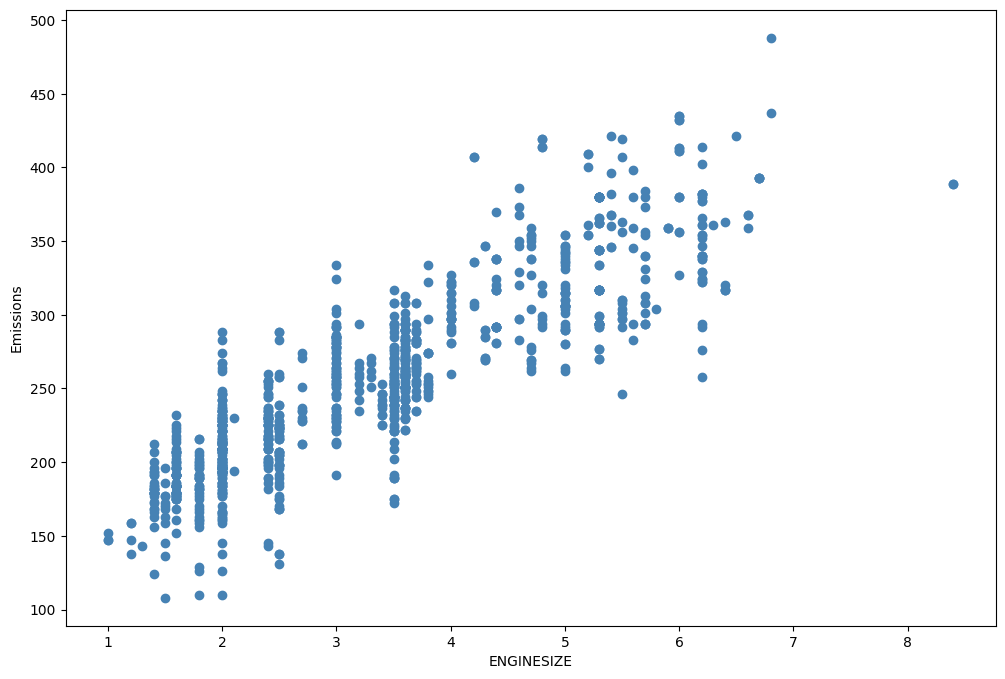

In [10]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()